In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the Data
dataset = pd.read_csv('asteroid_data2.csv', sep=',', na_values=["n/a", "na", "--"])

In [3]:
dataset.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


##### Cheking Missing Values

In [4]:
dataset.isnull().any()

Neo Reference ID                False
Name                            False
Absolute Magnitude              False
Est Dia in KM(min)              False
Est Dia in KM(max)              False
Est Dia in M(min)               False
Est Dia in M(max)               False
Est Dia in Miles(min)           False
Est Dia in Miles(max)           False
Est Dia in Feet(min)            False
Est Dia in Feet(max)            False
Close Approach Date             False
Epoch Date Close Approach       False
Relative Velocity km per sec    False
Relative Velocity km per hr     False
Miles per hour                  False
Miss Dist.(Astronomical)        False
Miss Dist.(lunar)               False
Miss Dist.(kilometers)          False
Miss Dist.(miles)               False
Orbiting Body                   False
Orbit ID                        False
Orbit Determination Date        False
Orbit Uncertainity              False
Minimum Orbit Intersection      False
Jupiter Tisserand Invariant     False
Epoch Oscula

In [5]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

##### Encoding Object columns in the right format

In [6]:
X['Close Approach Date'] = pd.to_datetime(X['Close Approach Date'])
X['Orbiting Body'] = LabelEncoder().fit_transform(X['Orbiting Body'])
X['Orbit Determination Date'] = pd.to_datetime(X['Orbit Determination Date'])
X['Equinox'] = LabelEncoder().fit_transform(X['Orbiting Body'])
y = LabelEncoder().fit_transform(y)

In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Neo Reference ID              4687 non-null   int64         
 1   Name                          4687 non-null   int64         
 2   Absolute Magnitude            4687 non-null   float64       
 3   Est Dia in KM(min)            4687 non-null   float64       
 4   Est Dia in KM(max)            4687 non-null   float64       
 5   Est Dia in M(min)             4687 non-null   float64       
 6   Est Dia in M(max)             4687 non-null   float64       
 7   Est Dia in Miles(min)         4687 non-null   float64       
 8   Est Dia in Miles(max)         4687 non-null   float64       
 9   Est Dia in Feet(min)          4687 non-null   float64       
 10  Est Dia in Feet(max)          4687 non-null   float64       
 11  Close Approach Date           

#### Droping 0 Variance Columns

In [8]:
variance = X.var()

for col in X.var().index:
    if variance[col] == 0:
        print(col)
        X.drop(col, axis=1, inplace=True)

Orbiting Body
Equinox


# Dropping useless features
    ######## The Features Description ########
    # Neo Reference ID - Near Earth Object (NEO) reference ID number for an asteroid (or a comet) which comes close to earth
    # Name - 'Name' of asteroid (same as NEO Reference ID)
    # Absolute Magnitude - A measure of the asteroid's luminosity (in H) (the brightness of an asteroid if it is 1 astronomical unit away from both the Sun and the observer, and the angle between the Sun, asteroid, and Earth is 0 degrees)
    # Est Dia in (in KM, M, Miles, and Feet) (min) - Minimum estimated diameter of the asteroid (Note: Since asteroids cannot be directly measured and because they have irregular shapes, their diameters are estimates. These estimates are calculated using its absolute magnitude and geometric albedo.)
    # Est Dia in (in KM, M, Miles, and Feet) (max) - Maximum estimated diameter of the asteroid
    # Close Approach Date - Date at which the asteroid approaches close to Earth
    # Epoch Date Close Approach - Date at which the asteroid approaches close to Earth (in epoch time)
    #   Relative Velocity (in km per sec, km per hr, and miles per hour) - Asteroid's velocity relative to earth
    #   Miss Dist.(in Astronomical, lunar, km, and miles) - Distance by which the asteroid misses Earth
    # Orbiting Body - 
    # Orbit ID - An ID of JPL NEA orbit that JPL Nasa uses in its analysis
    # Orbit Determination Date - Date at which the asteroid's orbit was determined
        # Orbit Uncertainity - A measure of the uncertainity ('measurement errors') in the calculated orbit
    # Minimum Orbit Intersection - The closest distance between Earth and the asteroid in their respective orbits (in astronomical units)
    # Jupiter Tisserand Invariant - A value used to differentiate between asteroids and Jupiter-family comets
    # Epoch Osculation - The instance of time at which the asteroid's position and velocity vectors (from which its osculating orbit is calculated) is specified
    # Eccentricity - A value which specifies by how much the asteroid's orbit deviates from a perfect circle
    # Semi Major Axis - The longest radius of an elliptical orbit; a easure of the asteroid's average distance from the Sun (asteroids orbit the Sun)
    # Inclination - Measures the tilt of the asteroid's orbit around the Sun
    # Asc Node Longitude - (copying from NASA) 'Angle in the ecliptic plane between the inertial-frame x-axis and the line through the ascending node'
    # Orbital Period - Time taken for asteroid to complete a single orbit around the Sun
    # Perihelion Distance - Distance of point in asteroid's orbit which is closest to the Sun
    # Perihelion Arg - (copying from Nasa) 'The angle (in the body's orbit plane) between the ascending node line and perihelion measured in the direction of the body's orbit'
    # Aphelion Dist - Distance of point in asteroid's orbit which is farthest from the Sun
    # Perihelion Time - Length of time of asteroid's passage through the perihelion stage
    # Mean Anomaly - (copying from Nasa) 'The product of an orbiting body's mean motion and time past perihelion passage'
    # Mean Motion - (copying from Nasa) 'The angular speed required for a body to make one orbit around an ideal ellipse with a specific semi-major axis'
    # Equinox - An astronomical standard to measure against (currently 'J2000.0')
    # Hazardous - Is the asteroid hazardous? (True or False)
    #################################################################################### 

##### Drop Neo Reference ID and Name as they are just identifiers

In [9]:
X.drop(['Neo Reference ID', 'Name'], axis=1, inplace=True)

##### We have also the estimated diameter of the asteroid (max and min) in km, m, miles and feets, we need just one of them so we will keep only the one with meters

In [10]:
X.drop(['Est Dia in KM(min)', 'Est Dia in KM(max)', 'Est Dia in Miles(min)', 
        'Est Dia in Miles(max)', 'Est Dia in Feet(min)', 'Est Dia in Feet(max)'], 
        axis=1, inplace=True)

##### we have Relative Velocity in km per sec, km per hr, and miles per hour . we'll keep km per second only

In [11]:
X.drop(['Relative Velocity km per hr', 'Miles per hour'], axis=1, inplace=True)

##### we have also Miss Dist (Distance by which the asteroid misses Earth) in Astronomical, lunar, km, and miles, we'll keep km only

In [12]:
X.drop(['Miss Dist.(Astronomical)', 'Miss Dist.(lunar)', 
        'Miss Dist.(miles)'], axis=1, inplace=True)

#####  we'll also drop Orbit Determination Date as there is no logical reason why it should affect the target

In [13]:
X.drop('Orbit Determination Date', axis=1, inplace=True)

#### since Jupiter Tisserand Invariant is exactly calculate from semi-major axis, eccentricity and inclination (https://en.wikipedia.org/wiki/Tisserand%27s_parameter), so there is no need to keep it because those three variables explain it perfectly

In [14]:
 X.drop('Jupiter Tisserand Invariant', axis=1, inplace=True)

#### Epoch Osculation is the instance of time at which the asteroid's position and velocity vectors is specified so we will drop it since it's not relevant to the target

In [15]:
X.drop('Epoch Osculation', axis=1, inplace=True)

##### Close Approach Date and Epoch Date Close Approach are the same measures in two different units, so keeping one of them is fine but i did a little bit of searching and i found out that these two features do not impact the target so we will remove them 

In [16]:
X.drop(['Close Approach Date', 'Epoch Date Close Approach'], axis=1, inplace=True)

#### Now we've finished removing features based on logical reasons which are inferred from the features description and some googling that i did

### let's check the correlation between the rest of the variables

In [17]:
correlation = X.corr()

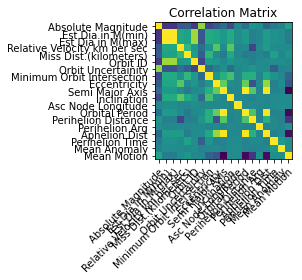

In [18]:
# Plotting a heatmap of the correlation matrix
def heatmap():
    fig, ax = plt.subplots()
    im = ax.imshow(correlation)
    
    ax.set_xticks(np.arange(len(correlation.columns)))
    ax.set_yticks(np.arange(len(correlation.columns)))
    ax.set_xticklabels(correlation.columns)
    ax.set_yticklabels(correlation.columns)
    
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    ax.set_title("Correlation Matrix")
    fig.tight_layout()
    plt.show()
heatmap()

After plotting the heatmap it is noticeable that the Estimated Diameter min and max has a correlation of 1 that means they are strictly correlated. It can be found out that they are calculated based on the absolute magnitude and an assumed geometric albedo (ratio of the light received by a body to the light reflected by that body). since we don't albedo in our dataset we need to keep only one of them or better approach is to calculate the average because keeping the only the min or max will make us underestimating or overestimating the asteroid 

In [19]:
X['Est Dia in M(average)'] = X[['Est Dia in M(min)', 'Est Dia in M(max)']].mean(axis=1)
X.drop(['Est Dia in M(min)', 'Est Dia in M(max)'], axis=1, inplace=True)

Aphelion Distance has about 0.98 correlation with Semi Major Axis and Orbital Period and 0.7 with Eccentricity and after a quick search I found out that Aphelion Distance is calculated based on Semi Major Axis and Eccentricity see this article (https://socratic.org/questions/how-do-you-calculate-the-aphelion-and-perihelion-of-a-comet-s-orbit-if-it-has-an#:~:text=The%20perihelion%20distance%20P%3Da,e%3D0.875%20is%20the%20eccentricity.)and for Orbital Period it's calculated using Kepler’s Third Law based on the constant pi, the semi-major axis, the gravitational constant, the mass of the Sun, and the mass of the comet. (we can ignore the mass of the comet because it's small comparing to the mass of the sun) (take a look at this link: https://public.nrao.edu/ask/how-to-calculate-the-orbital-period-of-a-comet-given-its-closest-and-furthest-orbital-distance/), so basically they are all constants besides the semi-major axis ,so we'll remove these two columns for now 

In [20]:
X.drop(['Aphelion Dist', 'Orbital Period'], axis=1, inplace=True)

We have also Orbit ID has a strong correlation with the Estimated Diameter,however i still think that Orbit ID should not be removed because multiple asteroids with the same estimated diameter could have different orbits, but keeping it will make the dataset very large since we will have to do a one hot encoding to it since it is a categorical variable so i think it's better to remove it considering the high correlation, Estimated Diameter will do a good job on its own, and for Orbit Uncertainty, it has high correlation with absolute magnitude and it's calculated using eccentricity, orbital period, which we already have it's components,and some other parameters

In [21]:
X.drop(['Orbit Uncertainity', 'Orbit ID'], axis=1, inplace=True)

we also have mean motion has a strong negative correlation with Semi Major Axis,basically it's calculated by dividing 2*pi on Orbital Period (which is mainly calculated using Semi Major Axis) so that make sense (see this article: https://en.wikipedia.org/wiki/Mean_motion)I think it's okay to drop this since it doesn't appear to hold any valuable information

In [22]:
X.drop('Mean Motion', axis=1, inplace=True)

I'm i'm still not quite sure about my way of thinking since i read that high
correlation doesn't imply redundancy so i tried to be sure that a variable that
i deleted doesn't explain valuable information to the model, but anyway i will still try
to fit the model with and without some variables

In [23]:
# Reordering our dataset
X = X[['Absolute Magnitude', 'Est Dia in M(average)', 'Relative Velocity km per sec',
       'Miss Dist.(kilometers)', 'Minimum Orbit Intersection', 'Eccentricity',
       'Semi Major Axis', 'Inclination', 'Asc Node Longitude',
       'Perihelion Distance', 'Perihelion Arg', 'Perihelion Time',
       'Mean Anomaly']]

#### Using Random Forest Feature importance to select the most important features

In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=1, max_depth=10)

In [25]:
model.fit(X,y)


RandomForestRegressor(max_depth=10, random_state=1)

In [26]:
features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-1:-4:-1]

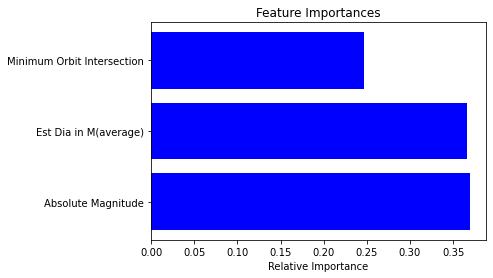

In [27]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Well we can clearly see in the feature importance graph that there are just three 
variables which contributes by more than 96% to the target then all the other 
variables, the other variables contribute with less than 1%, so we will just 
keep only those three variables:
(Minimum Orbit Intersection, Est Dia in M(average) and Absolute Magnitude)

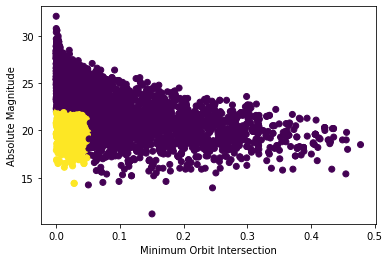

In [28]:
# Plotting the Data since we have only three features 
X = X.iloc[:, indices]

def plotData2D(X=X, y_=y):
    
    fig, ax = plt.subplots()
    ax.scatter(x = X['Minimum Orbit Intersection'], 
               y = X['Absolute Magnitude'],
               c = y_.T)
    plt.xlabel("Minimum Orbit Intersection")
    plt.ylabel("Absolute Magnitude")    
    plt.show()
plotData2D()

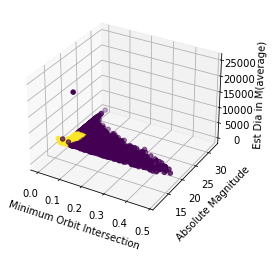

In [29]:
def plotData3D(y_=y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection = '3d')
    
    x = X['Minimum Orbit Intersection']
    y = X['Absolute Magnitude']
    z = X['Est Dia in M(average)']
    
    ax.scatter(x, y, z, c = y_.T)
    ax.set_xlabel('Minimum Orbit Intersection')
    ax.set_ylabel('Absolute Magnitude')
    ax.set_zlabel('Est Dia in M(average)')
    
    plt.show()
plotData3D()

### From these Plots we can see that the data is well distributed where all hazardous asteroids has an absolute magnitude which is roughly < 23 and minimum orbit intersection which is < 0.6

0.8389161510561126


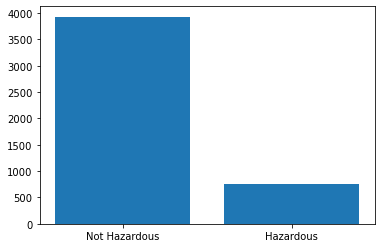

In [30]:
# Plotting the number instances in Classes
def plotCounts(y=y):
    unique, counts = np.unique(y, return_counts=True)
    print(counts[0]/sum(counts))
    plt.bar([0, 1], counts, width=0.8, align='center')
    plt.xticks([0, 1], ['Not Hazardous', 'Hazardous'])
    plt.show()
plotCounts()

Unfortunately we can clearly see that the data is imbalanced by having about 84% of the asteroids as not hazardous and about 16% as hazardous HANDLING IMBALANCED DATA to handle the imbalanced data we will use and compare multiple techniques and algorithms from the graph above we can clearly see that all Hazardous data points and condensed in a small region, I don't think using oversampling here is a good idea, instead we could just use undersampling or try cost-sensitive down-weighting CondensedNearestNeighbour removes too many instances we will not use it

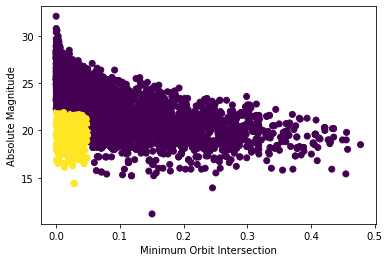

In [35]:
# NeighbourhoodCleaningRule technique for undersampling

from imblearn.under_sampling import NeighbourhoodCleaningRule
ncr = NeighbourhoodCleaningRule(sampling_strategy='majority', n_neighbors=5, kind_sel='mode')
ncr_X, ncr_y = ncr.fit_resample(X, y)
plotData2D(ncr_X, ncr_y)

NeighbourhoodCleaningRule also doesn't work  for this dataset because it removes many data points in just one region and that will mess up our decision boundary and make our predictions worse. 

To clarify more, all UNN methods won't work perfectly for this dataset because most of data points of the majority class are condensed in one region while this region is where data points should be removed from, but UNN methods would remove data points from weeker regions until it clears them out before even starting to remove from the strong region, and this would change the distribution of data points of the majority class, and that's a thing we don't want to happen

This leave us to use random undersampling 

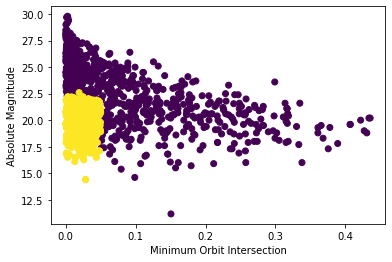

In [38]:
# RandomUnderSampler technique for undersampling

rus = RandomUnderSampler(sampling_strategy=1)
rus_X, rus_y = rus.fit_resample(X, y)
plotData2D(rus_X, rus_y)